Iteration	m		b		Cost
0		0.6886		0.1429		21.9789
100		1.5945		0.6411		1.6291
200		1.5528		0.8472		1.5844
300		1.5245		0.9874		1.5637
400		1.5053		1.0827		1.5542
500		1.4922		1.1476		1.5497
600		1.4833		1.1918		1.5477
700		1.4772		1.2218		1.5467
800		1.4731		1.2422		1.5463
900		1.4703		1.2561		1.5461

Final Slope (m): 1.4683646706493594
Final Intercept (b): 1.265515534394632
Final Cost: 1.5459999960002784


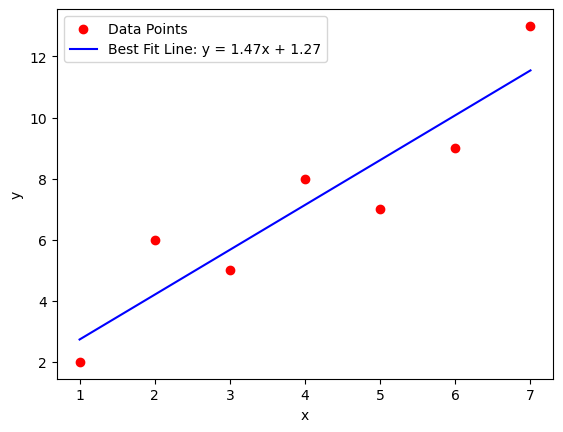


Sklearn Slope (m): 1.4642857142857142
Sklearn Intercept (b): 1.2857142857142865


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data points
lst = [[1, 2], [2, 6], [3, 5], [4, 8], [5, 7], [6, 9], [7, 13]]
x = np.array([point[0] for point in lst])
y = np.array([point[1] for point in lst])

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Initialize parameters
m = 0  # Slope
b = 0  # Intercept

# Function to compute Mean Squared Error
def compute_cost(x, y, m, b):
    total_cost = 0
    N = len(x)
    for i in range(N):
        total_cost += (y[i] - (m * x[i] + b)) ** 2
    return total_cost / N

# Gradient Descent
print(f"Iteration\tm\t\tb\t\tCost")
for iteration in range(num_iterations):
    m_gradient = 0
    b_gradient = 0
    N = len(x)
    for i in range(N):
        # Calculate the gradient
        m_gradient += -(2/N) * x[i] * (y[i] - (m * x[i] + b))
        b_gradient += -(2/N) * (y[i] - (m * x[i] + b))
    
    # Update m and b using the gradients
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient

    # Print the current state
    if iteration % 100 == 0:  # Print every 100 iterations
        cost = compute_cost(x, y, m, b)
        print(f"{iteration}\t\t{m:.4f}\t\t{b:.4f}\t\t{cost:.4f}")

# Final values after gradient descent
final_cost = compute_cost(x, y, m, b)
print(f"\nFinal Slope (m): {m}")
print(f"Final Intercept (b): {b}")
print(f"Final Cost: {final_cost}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, m*x + b, color='blue', label=f'Best Fit Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Using sklearn's LinearRegression to verify
x_reshaped = x.reshape(-1, 1)  # Reshape for sklearn
model = LinearRegression()
model.fit(x_reshaped, y)

# Get parameters from sklearn model
sklearn_m = model.coef_[0]
sklearn_b = model.intercept_

print(f"\nSklearn Slope (m): {sklearn_m}")
print(f"Sklearn Intercept (b): {sklearn_b}")


Iteration	Theta		Loss
0		0.0000		2.0000
1		0.0300		1.9137
2		0.0575		1.8410
3		0.0827		1.7803
4		0.1057		1.7299
5		0.1266		1.6884
6		0.1455		1.6543
7		0.1626		1.6266
8		0.1780		1.6040
9		0.1919		1.5858
10		0.2043		1.5711
11		0.2154		1.5593
12		0.2254		1.5499
13		0.2343		1.5424
14		0.2423		1.5364
15		0.2494		1.5316
16		0.2557		1.5279
17		0.2613		1.5249
18		0.2663		1.5225
19		0.2708		1.5207
20		0.2747		1.5192
21		0.2782		1.5180
22		0.2813		1.5171
23		0.2840		1.5164
24		0.2865		1.5159
25		0.2886		1.5154
26		0.2906		1.5151
27		0.2922		1.5148
28		0.2937		1.5146
29		0.2951		1.5144
30		0.2962		1.5143
31		0.2973		1.5142
32		0.2982		1.5141
33		0.2990		1.5141
34		0.2997		1.5140
35		0.3003		1.5140
36		0.3009		1.5140
37		0.3014		1.5139
38		0.3018		1.5139
39		0.3022		1.5139
40		0.3026		1.5139
41		0.3029		1.5139
42		0.3031		1.5139
43		0.3034		1.5139
44		0.3036		1.5139
45		0.3038		1.5139
46		0.3039		1.5139
47		0.3041		1.5139
48		0.3042		1.5139
49		0.3043		1.5138
Convergence reached.

Optimal Theta: 0

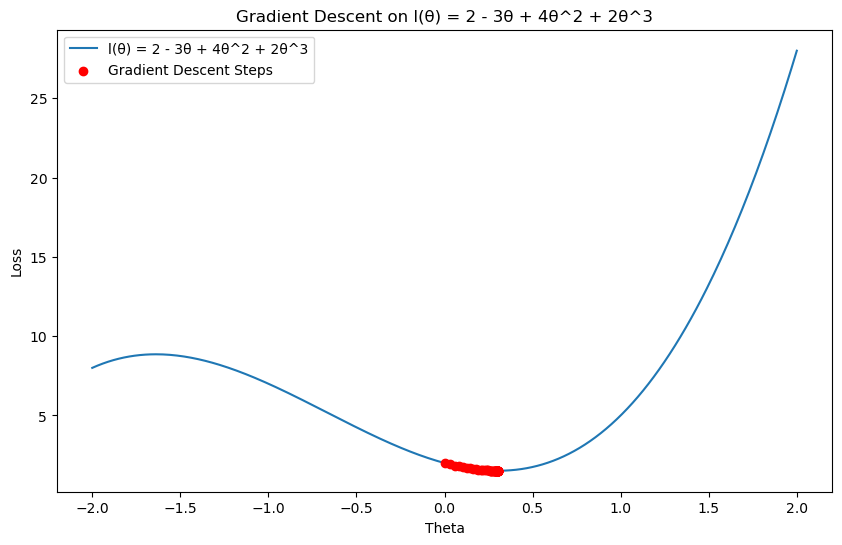

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def l(theta):
    return 2 - 3*theta + 4*theta**2 + 2*theta**3

def gradient(theta):
    return -3 + 8*theta + 6*theta**2

# Parameters for gradient descent
learning_rate = 0.01
num_iterations = 100
theta = 0.0  # Initial value of theta
tolerance = 1e-4

# Lists to store values for plotting
theta_values = []
loss_values = []

print(f"Iteration\tTheta\t\tLoss")
for iteration in range(num_iterations):
    theta_values.append(theta)
    loss = l(theta)
    loss_values.append(loss)
    
    # Compute the gradient
    grad = gradient(theta)
    
    # Update theta
    theta_new = theta - learning_rate * grad
    
    # Print iteration details
    print(f"{iteration}\t\t{theta:.4f}\t\t{loss:.4f}")
    
    # Check for convergence
    if abs(theta_new - theta) < tolerance:
        print("Convergence reached.")
        break
    
    theta = theta_new

# Final values
print(f"\nOptimal Theta: {theta}")
print(f"Final Loss: {l(theta)}")

# Plotting the function and the path of gradient descent
theta_range = np.linspace(-2, 2, 400)
loss_range = l(theta_range)

plt.figure(figsize=(10, 6))
plt.plot(theta_range, loss_range, label='l(θ) = 2 - 3θ + 4θ^2 + 2θ^3')
plt.scatter(theta_values, loss_values, color='red', label='Gradient Descent Steps', zorder=5)
plt.xlabel('Theta')
plt.ylabel('Loss')
plt.title('Gradient Descent on l(θ) = 2 - 3θ + 4θ^2 + 2θ^3')
plt.legend()
plt.show()

Iteration	Theta		Loss
0		0.0000		2.0000
1		0.3750		1.5430
2		0.3075		1.5139
3		0.3052		1.5138
Convergence reached.

Optimal Theta: 0.3051614627887083
Final Loss: 1.5138451032917128


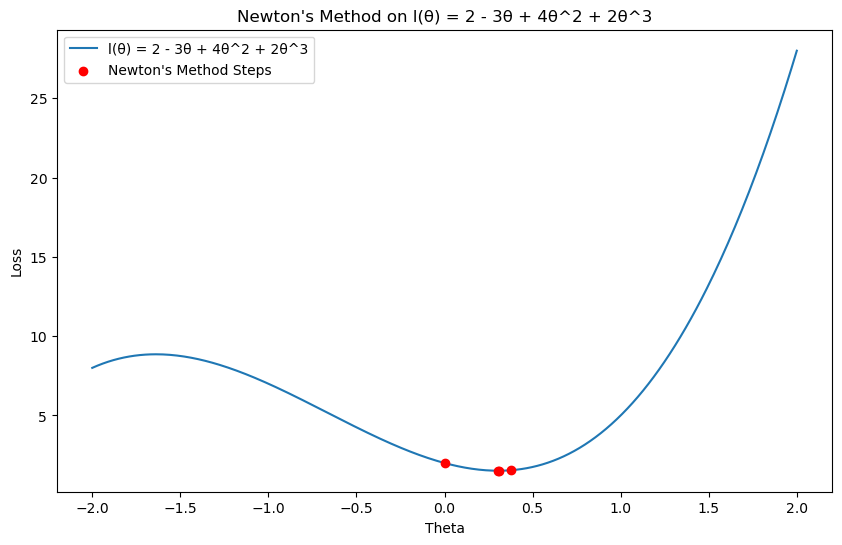

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivatives
def l(theta):
    return 2 - 3*theta + 4*theta**2 + 2*theta**3

def gradient(theta):
    return -3 + 8*theta + 6*theta**2

def hessian(theta):
    return 8 + 12*theta

# Parameters for Newton's method
num_iterations = 10
theta = 0.0  # Initial value of theta
tolerance = 1e-4

# Lists to store values for plotting
theta_values = []
loss_values = []

print(f"Iteration\tTheta\t\tLoss")
for iteration in range(num_iterations):
    theta_values.append(theta)
    loss = l(theta)
    loss_values.append(loss)
    
    # Compute the gradient and Hessian
    grad = gradient(theta)
    hess = hessian(theta)
    
    # Update theta using Newton's method
    theta_new = theta - grad / hess
    
    # Print iteration details
    print(f"{iteration}\t\t{theta:.4f}\t\t{loss:.4f}")
    
    # Check for convergence
    if abs(theta_new - theta) < tolerance:
        print("Convergence reached.")
        break
    
    theta = theta_new

# Final values
print(f"\nOptimal Theta: {theta}")
print(f"Final Loss: {l(theta)}")

# Plotting the function and the path of Newton's method
theta_range = np.linspace(-2, 2, 400)
loss_range = l(theta_range)

plt.figure(figsize=(10, 6))
plt.plot(theta_range, loss_range, label='l(θ) = 2 - 3θ + 4θ^2 + 2θ^3')
plt.scatter(theta_values, loss_values, color='red', label='Newton\'s Method Steps', zorder=5)
plt.xlabel('Theta')
plt.ylabel('Loss')
plt.title('Newton\'s Method on l(θ) = 2 - 3θ + 4θ^2 + 2θ^3')
plt.legend()
plt.show()

Convergence reached after 2 iterations.


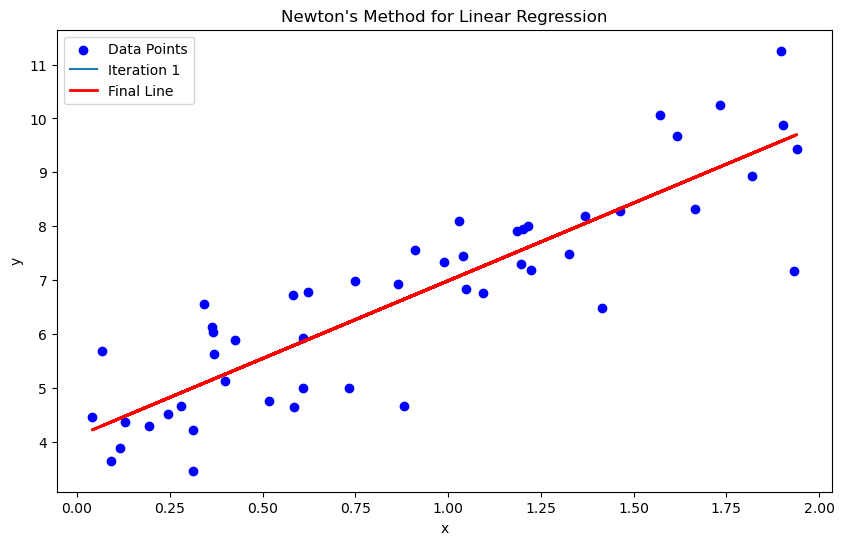

Final coefficients: theta0 = 4.096689274468887, theta1 = 2.8882830019265513
Scikit-learn coefficients: theta0 = 4.096689274468886, theta1 = 2.888283001926552


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data points
np.random.seed(42)
n_points = 50
X = 2 * np.random.rand(n_points, 1)
y = 4 + 3 * X + np.random.randn(n_points, 1)

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((n_points, 1)), X]

# Newton's Method parameters
theta = np.random.randn(2, 1)  # Random initialization for theta_0 and theta_1
n_iterations = 10
tolerance = 1e-6

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
theta_path = [theta.copy()]

# Newton's Method Iteration
for iteration in range(n_iterations):
    # Predictions based on current theta
    y_pred = X_b.dot(theta)
    
    # Compute gradients (first derivative of J with respect to theta)
    gradients = X_b.T.dot(y_pred - y)
    
    # Compute Hessian (second derivative of J with respect to theta)
    hessian = X_b.T.dot(X_b)
    
    # Update theta
    theta_prev = theta.copy()
    theta -= np.linalg.inv(hessian).dot(gradients)
    
    # Keep track of the path of theta
    theta_path.append(theta.copy())
    
    # Plot the current line
    if iteration % 2 == 0 or iteration == n_iterations - 1:
        plt.plot(X, X_b.dot(theta), label=f'Iteration {iteration + 1}')
    
    # Check for convergence
    if np.linalg.norm(theta - theta_prev) < tolerance:
        print(f"Convergence reached after {iteration + 1} iterations.")
        break

# Final line
plt.plot(X, X_b.dot(theta), label='Final Line', color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Newton's Method for Linear Regression")
plt.legend()
plt.show()

# Output final coefficients
theta0, theta1 = theta[0, 0], theta[1, 0]
print(f"Final coefficients: theta0 = {theta0}, theta1 = {theta1}")

# Verification using scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)
theta0_sklearn, theta1_sklearn = lin_reg.intercept_[0], lin_reg.coef_[0][0]
print(f"Scikit-learn coefficients: theta0 = {theta0_sklearn}, theta1 = {theta1_sklearn}")
